In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_csv('df1_stock.csv')

In [3]:
df['status'].value_counts()

In Stock    713788
Name: status, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713788 entries, 0 to 713787
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   category         713788 non-null  int64  
 1   manufacturer     713788 non-null  object 
 2   part_number      713788 non-null  object 
 3   sku              713788 non-null  object 
 4   alt_sku          8242 non-null    object 
 5   description      713788 non-null  object 
 6   status           713788 non-null  object 
 7   qty              713788 non-null  int64  
 8   price            713788 non-null  float64
 9   sku_create_date  713788 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 54.5+ MB


In [ ]:
df.columns

Index(['category', 'manufacturer', 'part_number', 'sku', 'alt_sku',
       'description', 'status', 'qty', 'price', 'sku_create_date'],
      dtype='object')

In [5]:
df.drop(['sku', 'alt_sku','description','status'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713788 entries, 0 to 713787
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   category         713788 non-null  int64  
 1   manufacturer     713788 non-null  object 
 2   part_number      713788 non-null  object 
 3   qty              713788 non-null  int64  
 4   price            713788 non-null  float64
 5   sku_create_date  713788 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 32.7+ MB


In [7]:
df = df.astype({"category":'category'})

In [8]:
df['sku_create_date'] = pd.to_datetime(df['sku_create_date'])

In [9]:
df = df.rename(columns={'sku_create_date': 'date', 'part_number': 'product'})

In [10]:
df.describe()

,qty,price
count,713788.000000,713788.000000
mean,152.365662,158.543729
std,1105.661017,553.645433
min,1.000000,0.000000
25%,8.000000,9.640000
50%,26.000000,28.060000
75%,89.000000,99.340000
max,60063.000000,69729.030000


In [ ]:
df.isnull().sum()

category        0
manufacturer    0
product         0
qty             0
price           0
date            0
dtype: int64

In [11]:
 df.to_csv('better_imus_stock_data.csv', index=False)

# Python Project


In [12]:
df.head()

,category,manufacturer,product,qty,price,date
0,9920,CASE LOGIC-PERSONAL & PORTABLE,3200943,7,99.00,2020-08-17
1,531,OMNITRON SYSTEMS,7206-0,2,59.09,2020-08-17
2,9070,ZEBRA ENTERPRISE MCD-A1,SAC5070-800CR,3,500.06,2020-08-17
3,9080,ZEBRA ENTERPRISE MCD-A1,KT-CLMPT-RS507-01R,115,86.34,2020-08-17
4,9080,ZEBRA ENTERPRISE MCD-A1,KT-PAD-RS507-10R,42,51.80,2020-08-17


## For data In Stock:

### 1. Which are the top Manufacturers with price, quantity?

In [ ]:
df56 = df.groupby('manufacturer').sum()

In [ ]:
df56.drop(['Total_Price'], axis=1, inplace=True)

In [ ]:
d57 = df56.sort_values(by=['qty', 'price'],ascending= False)[:10]

In [ ]:
d58 = d57.reset_index()

In [ ]:
d58

,manufacturer,qty,price
0,STARTECH.COM,16069681,7266737.29
1,DELL CSG SERVICE WARRANTIES,13578833,150917.91
2,TRIPP LITE CONNECTIVITY,8283765,768146.62
3,LOGITECH - COMPUTER ACCESSORIES,8251159,1005042.67
4,JABRA BUSINESS,4829490,392963.51
5,PLANTRONICS INC,3825984,703634.71
6,CONFIG 6,3825896,2140.78
7,BELKIN - CABLES,3508335,262931.76
8,DELL ESG WARRANTIES,3149689,173018.32
9,EPOS,3127008,1127406.70


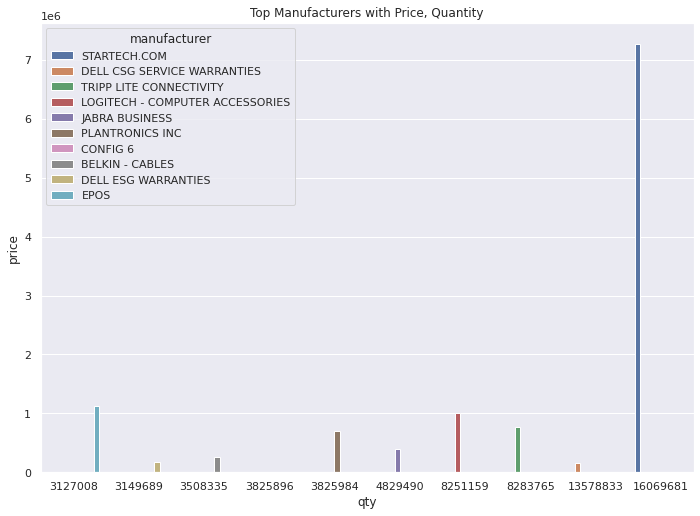

In [ ]:
x = sns.barplot(x = 'qty',y = 'price',hue="manufacturer",  data=d58).set(title='Top Manufacturers with Price, Quantity')

### 2. Which are the most profitable products?
Based on Total Price 

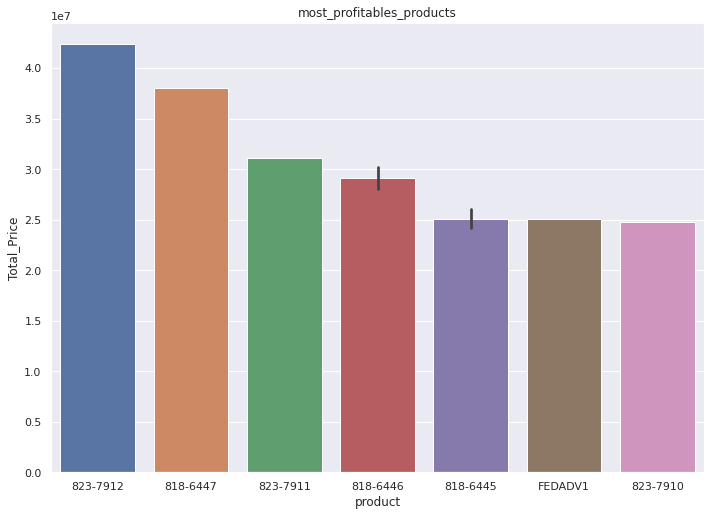

In [ ]:
profit = sns.barplot(x = 'product',y = 'Total_Price',data = most_profitable_products).set(title='most_profitables_products')

In [ ]:
most_profitable_products['product']

In [ ]:
df.columns

In [ ]:
df['Total_Price'] =df['qty']*df['price']

In [ ]:
df.head()

In [ ]:
df0 = df.groupby(['product','Total_Price'])

In [ ]:
df1 = df0.sum().sort_values(by='Total_Price',ascending=[False])[:10]

In [ ]:
[df1.drop(['qty', 'price'], axis=1, inplace=True)

In [ ]:
most_profitable_products = df1.reset_index()

In [ ]:
df1

In [ ]:
most_profitable_products

###  3. Which is the product where you have seen a decrease in the price?

In [13]:
pric_01 = df.drop(['manufacturer', 'category','qty'], axis=1)

In [18]:
 df.to_csv('price_trend.csv', index=False)

In [17]:
pric_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713788 entries, 0 to 713787
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   product  713788 non-null  object        
 1   price    713788 non-null  float64       
 2   date     713788 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.3+ MB


In [ ]:
df202 = df101.drop_duplicates()

In [ ]:
df101.head()

,product,price,date
0,3200943,99.00,2020-08-17
1,7206-0,59.09,2020-08-17
2,SAC5070-800CR,500.06,2020-08-17
3,KT-CLMPT-RS507-01R,86.34,2020-08-17
4,KT-PAD-RS507-10R,51.80,2020-08-17


In [ ]:
df102 = df101.groupby(['product']).max()

In [ ]:
df103 = df101.groupby(['product']).min()

In [ ]:
df201 = df202.groupby(['product'])

In [ ]:
df201.get_group('DP2VGAA')

In [ ]:
df108 = df202.groupby(['product','date']).mean()

In [ ]:
df202.pivot( columns =['product','date'], values =['price'])

In [ ]:
df108

price
product          date               
0-00496          2020-08-17    59.62
                 2020-08-24    59.62
0-00498          2020-08-17    96.65
003-000884-01-OE 2020-08-17   391.44
                 2020-08-24   391.44
...                              ...
ZT62063-T01A100Z 2020-08-24  4140.69
ZT62063-T110100Z 2020-08-17  4344.44
                 2020-08-24  4344.44
ZUCUBJCK         2020-08-17    16.74
                 2020-08-24    16.74

[111056 rows x 1 columns]

In [ ]:
df108[df108['price'] >= 1].sort_values('price',ascending=False)

,price,date
product,,
FEE SKU,81,81
XDM31255M-WU,40,40
XD-COMBO,40,40
XDS-P,40,40
RW3-WU,40,40
...,...,...
F8J054BTBLK,1,1
LBS005A,1,1
F7U099BT04-BLK,1,1


In [ ]:
df108.sort_values('price',ascending=False)

,price,date
product,,
DP2VGAA,190,190
DPM-VGAF,185,185
USB3GIG,182,182
F8E081-RED,180,180
14201-33,180,180
...,...,...
FRM-SF-D5085-65,1,1
71B0H40,1,1
71B0H30,1,1


In [ ]:
df103.sort_values('price',ascending=False)

,price,date
product,,
SCX-5835FN - TAA,0.00,2020-08-17
BTRY-MC55EAB00,0.00,2020-08-17
01921,0.20,2020-08-17
03820,0.44,2020-08-17
03810,0.44,2020-08-17
...,...,...
R3S71A,26350.60,2020-08-19
JW675A,29385.55,2020-08-20
JW830A,35554.13,2020-08-20


In [ ]:
df102.sort_values('price',ascending=False)

,price,date
product,,
JL376A#B2B,69729.03,2020-08-20
R3S72A,40893.99,2020-08-28
JW830A,35554.13,2020-08-20
JW675A,29385.55,2020-08-20
R3S71A,26350.60,2020-08-19
...,...,...
REMOTE-VRBOX,0.59,2020-08-28
03820,0.46,2020-08-27
03810,0.46,2020-08-24


In [ ]:
df110= df101.groupby(['date','price']).max()

In [ ]:
df110.head()

product
date       price                                                   
2020-08-17 0.00                      SCX-5835FN - TAABTRY-MC55EAB00
           0.20   0192101921019210192101921019210192101921019210...
           0.21                                               01921
           0.44   0381003810038100381003810038100381003810038100...
           0.46                                          0381003820

In [ ]:
df102

price
product          date             
0-00496          2020-08-17      1
                 2020-08-24      1
0-00498          2020-08-17      1
003-000884-01-OE 2020-08-17      2
                 2020-08-24      2
...                            ...
ZT62063-T01A100Z 2020-08-24      1
ZT62063-T110100Z 2020-08-17      1
                 2020-08-24      1
ZUCUBJCK         2020-08-17      1
                 2020-08-24      1

[111056 rows x 1 columns]

### 4. Which is the product where you have seen an increase in the price?


### 5. Which is the top category by price and quantity?



In [ ]:
d91

0    1221
1    2220
2    9970
3    2240
4    3350
5    9995
6     303
7    2201
8    1251
9     101
Name: category, dtype: category
Categories (135, int64): [1, 4, 5, 11, ..., 9970, 9990, 9995, 9999]

In [ ]:
df86 = df.groupby('category').sum()

In [ ]:
df86.drop(['Total_Price'], axis=1, inplace=True)

In [ ]:
d87 = df86.sort_values(by=['qty', 'price'],ascending= False)[:10]

In [ ]:
d89 = d87.reset_index()

In [ ]:
d90 =d89[:10]

In [ ]:
d90

,category,qty,price
0,1221,17378795,346527.07
1,2220,12851216,1741955.11
2,9970,8618185,1389155.66
3,2240,8264370,1520556.20
4,3350,7068656,580035.13
5,9995,5015339,970241.61
6,303,4902118,4544824.27
7,2201,4715114,558368.49
8,1251,4347126,13541.88
9,101,3877634,11079362.36


In [ ]:
d91=d90['category']

In [ ]:
df92= d91.astype({"category":'category'})

### 6. Which products are aging?

[Text(0.5, 1.0, 'aging_products')]

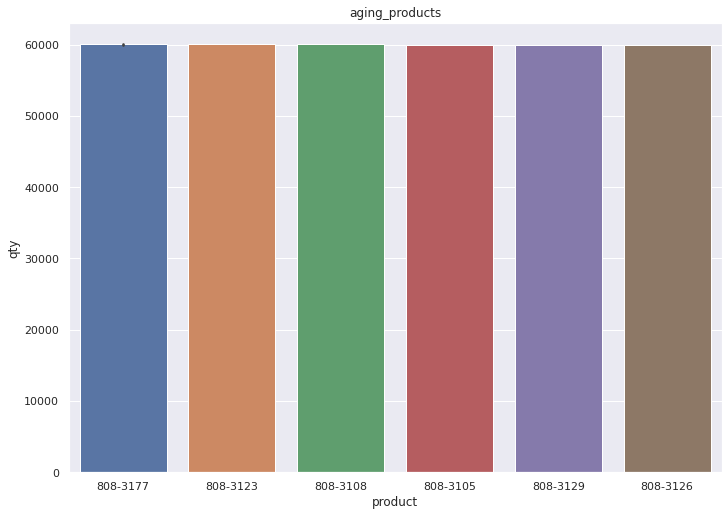

In [ ]:
sns.barplot(x = 'product',y = 'qty',data = aging_products).set(title='aging_products')

In [ ]:
df.head()

,category,manufacturer,product,qty,price,date,Total_Price
0,9920,CASE LOGIC-PERSONAL & PORTABLE,3200943,7,99.00,2020-08-17,693.00
1,531,OMNITRON SYSTEMS,7206-0,2,59.09,2020-08-17,118.18
2,9070,ZEBRA ENTERPRISE MCD-A1,SAC5070-800CR,3,500.06,2020-08-17,1500.18
3,9080,ZEBRA ENTERPRISE MCD-A1,KT-CLMPT-RS507-01R,115,86.34,2020-08-17,9929.10
4,9080,ZEBRA ENTERPRISE MCD-A1,KT-PAD-RS507-10R,42,51.80,2020-08-17,2175.60


In [ ]:
df4 = df.groupby(['product','qty'])

In [ ]:
df5 = df4.sum().sort_values(by='qty',ascending=[False])[:10]

In [ ]:
df5

price  Total_Price
product  qty                       
808-3177 60063   38.76   2328041.88
808-3123 60018  129.96   7799939.28
808-3108 60014  136.42   8187109.88
808-3105 60005   84.24   5054821.20
         60004   84.06   5043936.24
         60002   84.24   5054568.48
808-3177 60000   38.68   2320800.00
808-3129 59999  267.10  16025732.90
         59996  267.10  16024931.60
808-3126 59996  377.07  22622691.72

In [ ]:
df5.drop(['price', 'Total_Price'], axis=1, inplace=True)

In [ ]:
df5

Empty DataFrame
Columns: []
Index: [(808-3177, 60063), (808-3123, 60018), (808-3108, 60014), (808-3105, 60005), (808-3105, 60004), (808-3105, 60002), (808-3177, 60000), (808-3129, 59999), (808-3129, 59996), (808-3126, 59996)]

In [ ]:
aging_products = df5.reset_index()

In [ ]:
sns.barplot(x = 'product',y = 'qty',data = aging_products).set(title='aging_products')

### 7. How to Decrease Product aging?